In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,763,764,764,764,765,844,851,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,74,81,84,86,86,86,86,86,86,88


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,235,246,249,257,265,270,294,300,309,327
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,34
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,630,638,646,653,661,667,673,681,690,698
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [5]:
del data_confirmed['Lat']
del data_confirmed['Long']
del data_confirmed['Province/State']

In [6]:
data_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551
1,Albania,0,0,0,0,0,0,0,0,0,...,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232
2,Algeria,0,0,0,0,0,0,0,0,0,...,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050
3,Andorra,0,0,0,0,0,0,0,0,0,...,763,764,764,764,765,844,851,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,74,81,84,86,86,86,86,86,86,88


In [7]:
data_confirmed = data_confirmed.T

In [8]:
data_confirmed.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data_confirmed.columns = data_confirmed.iloc[0]

In [10]:
data_confirmed = data_confirmed.iloc[1:]

In [11]:
data_confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_confirmed.rename(columns={'Country/Region':'date'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
...,...,...,...,...
2020-05-14,7134,255,353,24
2020-05-15,7479,345,356,3
2020-05-16,7805,326,363,7
2020-05-17,8068,263,373,10


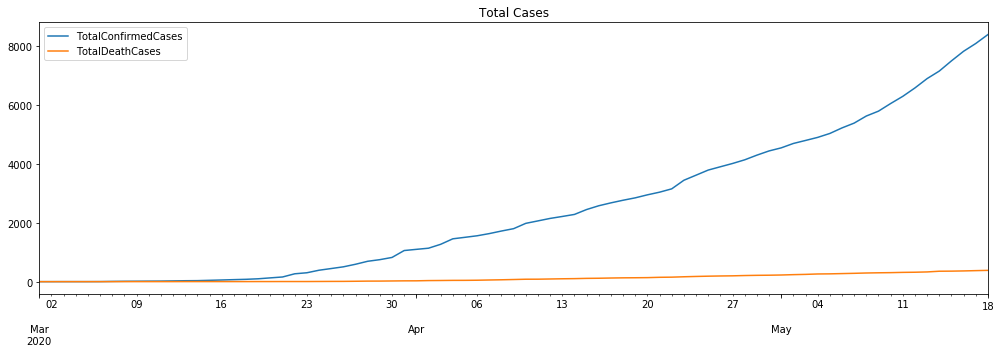

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

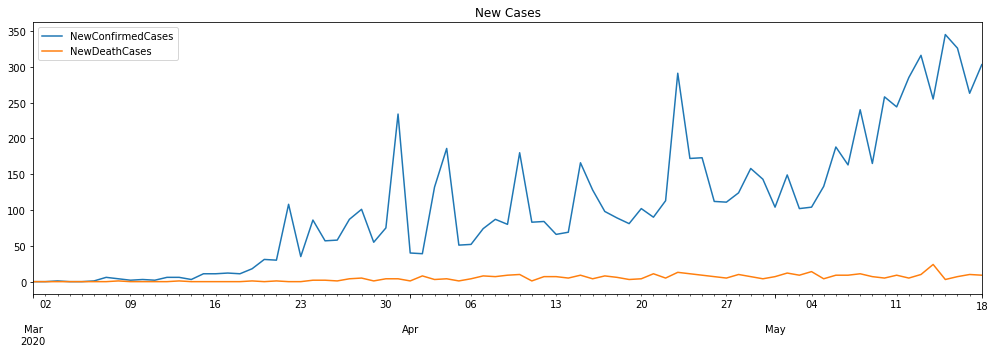

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
...,...,...
2020-05-14,7134,255
2020-05-15,7479,345
2020-05-16,7805,326
2020-05-17,8068,263


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]

In [29]:
#Testing only
#data_argentina = data_argentina.head(45)

In [30]:
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [31]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-05-14,7134,255,353,24,75
2020-05-15,7479,345,356,3,76
2020-05-16,7805,326,363,7,77
2020-05-17,8068,263,373,10,78
2020-05-18,8371,303,382,9,79


In [32]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [33]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [34]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def fourth_pow_model(x, a, b, c, d, e):
        return (a*x**4 + b*x**3 +c*x**2 + d*x + e)
    
#    def fiveth_pow_model(x, a, b, c, d, e, f):
#        return (a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f)
#    
#    def sixh_pow_model(x, a, b, c, d, e, f, g):
#        return (a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g)
#    
#    def exp_model(x, c, k):
#        return c * np.exp(k * x)

In [35]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [36]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.pyplot.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.pyplot.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.pyplot.plot(x, model(x, *popt))
    plt.pyplot.plot(x, y, 'ro')
    plt.pyplot.show()

In [37]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-05-19 | 8107|
|2020-05-20 | 8328|
|2020-05-21 | 8552|
|2020-05-22 | 8779|
|2020-05-23 | 9009|
|2020-05-24 | 9241|
|2020-05-25 | 9477|
|2020-05-26 | 9716|
|2020-05-27 | 9958|
|2020-05-28 | 10202|
|2020-05-29 | 10450|
|2020-05-30 | 10701|
|2020-05-31 | 10954|
|2020-06-01 | 11211|
|2020-06-02 | 11470|
|2020-06-03 | 11733|
|2020-06-04 | 11998|
|2020-06-05 | 12266|
|2020-06-06 | 12538|
|2020-06-07 | 12812|
|2020-06-08 | 13089|
|2020-06-09 | 13369|
|2020-06-10 | 13652|
|2020-06-11 | 13938|
|2020-06-12 | 14228|
|2020-06-13 | 14520|
|2020-06-14 | 14815|
|2020-06-15 | 15113|
|2020-06-16 | 15413|
|2020-06-17 | 15717|
-------------------


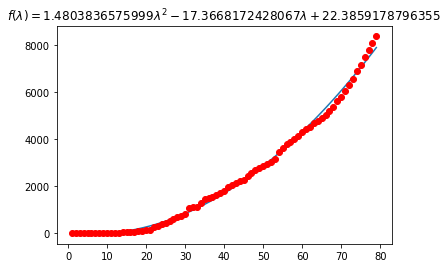

cubic_model
--- Predictions ---
|2020-05-19 | 8216|
|2020-05-20 | 8454|
|2020-05-21 | 8695|
|2020-05-22 | 8940|
|2020-05-23 | 9190|
|2020-05-24 | 9443|
|2020-05-25 | 9701|
|2020-05-26 | 9962|
|2020-05-27 | 10228|
|2020-05-28 | 10498|
|2020-05-29 | 10772|
|2020-05-30 | 11050|
|2020-05-31 | 11333|
|2020-06-01 | 11619|
|2020-06-02 | 11910|
|2020-06-03 | 12205|
|2020-06-04 | 12505|
|2020-06-05 | 12809|
|2020-06-06 | 13117|
|2020-06-07 | 13430|
|2020-06-08 | 13747|
|2020-06-09 | 14069|
|2020-06-10 | 14395|
|2020-06-11 | 14725|
|2020-06-12 | 15060|
|2020-06-13 | 15400|
|2020-06-14 | 15744|
|2020-06-15 | 16092|
|2020-06-16 | 16446|
|2020-06-17 | 16804|
-------------------


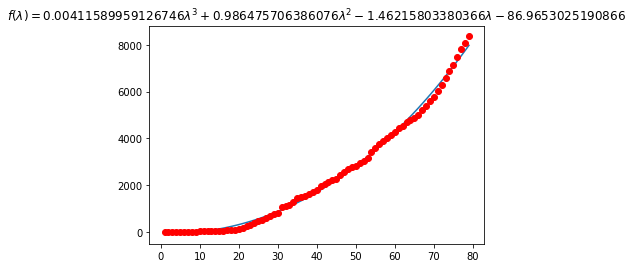

fourth_pow_model
--- Predictions ---
|2020-05-19 | 8587|
|2020-05-20 | 8917|
|2020-05-21 | 9261|
|2020-05-22 | 9620|
|2020-05-23 | 9995|
|2020-05-24 | 10385|
|2020-05-25 | 10793|
|2020-05-26 | 11218|
|2020-05-27 | 11661|
|2020-05-28 | 12123|
|2020-05-29 | 12605|
|2020-05-30 | 13106|
|2020-05-31 | 13629|
|2020-06-01 | 14174|
|2020-06-02 | 14741|
|2020-06-03 | 15331|
|2020-06-04 | 15945|
|2020-06-05 | 16585|
|2020-06-06 | 17250|
|2020-06-07 | 17941|
|2020-06-08 | 18660|
|2020-06-09 | 19407|
|2020-06-10 | 20184|
|2020-06-11 | 20990|
|2020-06-12 | 21828|
|2020-06-13 | 22697|
|2020-06-14 | 23599|
|2020-06-15 | 24535|
|2020-06-16 | 25505|
|2020-06-17 | 26512|
-------------------


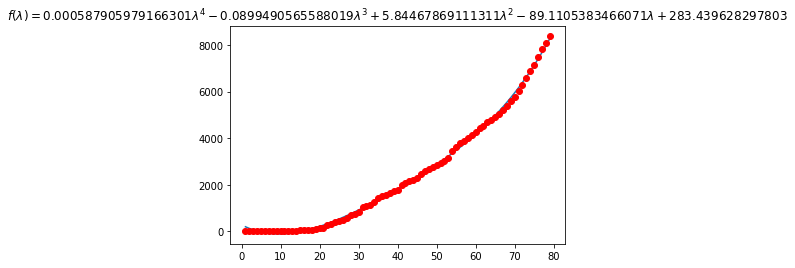

In [38]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.num_id, data_argentina.TotalConfirmedCases)